<a href="https://colab.research.google.com/github/aleks-haksly/AI/blob/main/L1/digits_recognition_experiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential # импортируем класс создания модели (последовательный)
from keras.layers import Dense # импортируем полносвязные слои
from keras.optimizers import Adam
from keras import utils # утилиты для to_categorical

In [40]:
import matplotlib.pyplot as plt
import ipywidgets
import numpy as np
import seaborn as sns
import pandas as pd

In [3]:
(x_train_org, y_train_org), (x_test_org, y_test_org) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [4]:
x_train =  x_train_org.reshape(60_000, 784).astype('float') / 255
x_test =  x_test_org.reshape(10_000, 784).astype('float') / 255

In [5]:
y_train = utils.to_categorical(y_train_org, 10)
y_test = utils.to_categorical(y_test_org, 10)

In [35]:
def make_model(n, b):
  model = Sequential()
  model.add(Dense(n, input_dim = 784, activation='relu', use_bias=False))
  model.add(Dense(10, activation='softmax', use_bias=False))
  model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=["accuracy"])
  model.fit(x_train, y_train, batch_size=b, epochs=15, verbose=0, validation_split=0.2)
  return model.evaluate(x_test, y_test)

In [25]:
y = [make_model(x) for x in range(10, 1110, 100)]

313/313 [==============================] - 1s 2ms/step - loss: 0.0692 - accuracy: 0.9829


<Axes: >

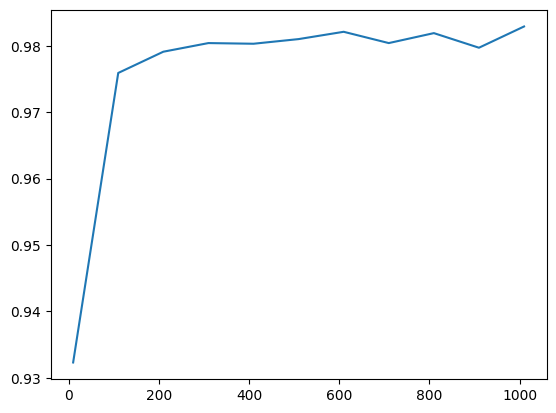

In [32]:
sns.lineplot(x=list(range(10, 1060, 100)), y=[y[1] for y in y])

In [36]:
y = [make_model(n, b) for n, b in [(n, b) for n in (10, 100, 5000) for b in (1, 10, 100, 60000)]]

313/313 [==============================] - 1s 3ms/step - loss: 0.2934 - accuracy: 0.9187


In [37]:
y

[[0.2854396104812622, 0.9276999831199646],
 [0.23464785516262054, 0.9376000165939331],
 [0.24166926741600037, 0.9327999949455261],
 [1.9251834154129028, 0.36059999465942383],
 [0.28010499477386475, 0.9715999960899353],
 [0.12535534799098969, 0.9785000085830688],
 [0.08401673287153244, 0.9754999876022339],
 [1.0165544748306274, 0.7888000011444092],
 [0.4717141091823578, 0.979200005531311],
 [0.28611117601394653, 0.975600004196167],
 [0.09168045222759247, 0.9829000234603882],
 [0.29344072937965393, 0.9186999797821045]]

In [38]:
ys = [[0.2854396104812622, 0.9276999831199646],
 [0.23464785516262054, 0.9376000165939331],
 [0.24166926741600037, 0.9327999949455261],
 [1.9251834154129028, 0.36059999465942383],
 [0.28010499477386475, 0.9715999960899353],
 [0.12535534799098969, 0.9785000085830688],
 [0.08401673287153244, 0.9754999876022339],
 [1.0165544748306274, 0.7888000011444092],
 [0.4717141091823578, 0.979200005531311],
 [0.28611117601394653, 0.975600004196167],
 [0.09168045222759247, 0.9829000234603882],
 [0.29344072937965393, 0.9186999797821045]]

[(10, 1),
 (10, 10),
 (10, 100),
 (10, 60000),
 (100, 1),
 (100, 10),
 (100, 100),
 (100, 60000),
 (5000, 1),
 (5000, 10),
 (5000, 100),
 (5000, 60000)]

In [52]:
plot_df = pd.concat([pd.DataFrame([(n, b) for n in (10, 100, 5000) for b in (1, 10, 100, 60000)], columns=['n', 'batch_size']), pd.DataFrame(ys, columns=['loss', 'accuracy'])], axis=1)

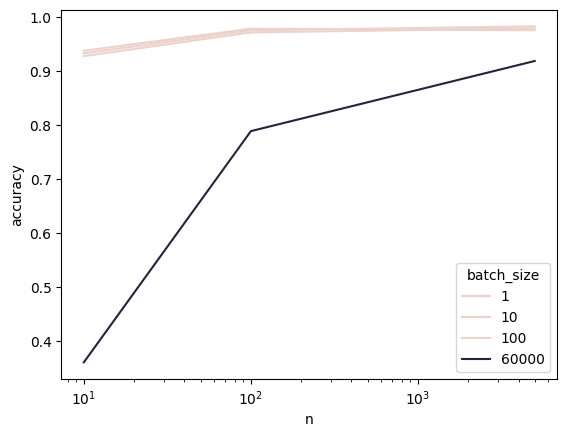

In [56]:
sns.lineplot(plot_df, x = 'n', y='accuracy', hue='batch_size')
plt.xscale('log')

In [55]:
plot_df

,n,batch_size,loss,accuracy
0,10,1,0.285440,0.9277
1,10,10,0.234648,0.9376
2,10,100,0.241669,0.9328
3,10,60000,1.925183,0.3606
4,100,1,0.280105,0.9716
5,100,10,0.125355,0.9785
6,100,100,0.084017,0.9755
7,100,60000,1.016554,0.7888
8,5000,1,0.471714,0.9792
9,5000,10,0.286111,0.9756
